# CS 506 Final Project Solar Histogram

CS 506 Spring 2018

Team: 

Jason Lu (jasonlu6@bu.edu)

Hugh Qu (hughfang@bu.edu)

Zixin "Cindy" Ding (cindydxz@bu.edu)

This code is used to generate a histogram in order to determine which communities are not benefitting from energy efficient systems. The x-axis shows the zip codes for each building parcel, whereas the y-axis shows the solar capacity usage (in kW, kilowatts), and the legend shows the occupancy type (according to the Parcel Data Set Key). 

The steps creating the histogram are:  

1) We parse the building permits CSV file 

2) Open the building permits csv file for solar panel text extraction

3) Groupby the zipcode, and extract the worktypes that only contain the regular expression string "SOL"

4) Create a "masking" dataframe that only contain the columns "Comments", "OCCUPANCYTYPE", "ZIP". 

6) Filter out with regular expressions that "SOL" worktypes that only contain "kW" (for solar capacity)

7) Replace all "-" with empty space (cleaning up the data)  

8) Concatenate all of the "OCCUPANCYTYPE" and "ZIP" for the columns of the histogram 

9) Group by the "OCCUPANCYTYPE" and "ZIP" of the histogram. 

10) Plot the histogram 

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


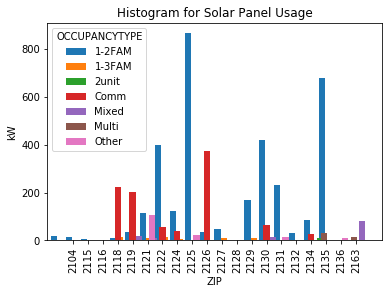

In [3]:
# import for dataframe and plots
import matplotlib.pyplot as plt 
import pandas as pd

# filter out for only 'SOL' and print out the comments corresponding 
work = pd.read_csv('buildingpermits.csv',encoding='latin-1')
d=work.groupby(['ZIP']).sum()
solar_mask = work[work['WORKTYPE'].str.contains("SOL")]

# reading the columns with only 'SOL' from worktype and corresponding comments 
# print out the capacity of the solar panels / energy systems 
# getting only the worktype and comments 
solar_filter = solar_mask[['Comments','OCCUPANCYTYPE','ZIP']]
y = solar_filter['Comments'].str.findall("(\S+)kW")
y1 = y.str[0].str.replace("-","")
y2 = pd.to_numeric(y1,errors='coerce')
p = pd.concat([solar_filter['OCCUPANCYTYPE'], y2,solar_mask['ZIP']], axis=1)
m = p[p['Comments'].notnull()]
m.columns = [m.columns[0], 'kW', m.columns[2]]
n = m.groupby(['ZIP','OCCUPANCYTYPE']).sum().unstack(fill_value=0)
n

# plot
n['kW'].plot(kind='bar', width=3)
plt.title("Histogram for Solar Panel Usage")
plt.ylabel("kW")
plt.show()